In [1]:
import sys
sys.path.append('../vysxd')
from vysxd_analysis import *
from vysxd_define import *
from transform import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.animation as manimation
from scipy import *

In [2]:
def density_transform(v: float, t: float, x: np.array):
    gamma = 1/np.sqrt(1-v**2)

    t1 = np.zeros(len(x))+t
    x1 = x

    t2 = gamma*(t1 - v*x1)
    x2 = gamma*(x1 - v*t1)
    return t2,x2

In [67]:
p1x1_files = np.sort(os.listdir('data/MS/PHA/p1x1/electrons/')) # Create a sorted list of filenames you will be analyzing
p1x1_temp = vysxd_get_data(f'data/MS/PHA/p1x1/electrons/{p1x1_files[0]}') # pick out the first timestep for reasons
time_prime, x_prime = density_transform(v=0.10,t=p1x1_temp.TIME[0],x=p1x1_temp.X)
density = -np.trapz(p1x1_temp.DATA, axis=0)

for file in p1x1_files[1:]:
    p1x1 = vysxd_get_data(f'data/MS/PHA/p1x1/electrons/{file}') # Pull the phase space data
    time_prime_temp, x_prime_temp = density_transform(v=0.10,t=p1x1.TIME[0],x=p1x1.X)
    density_temp = -np.trapz(p1x1.DATA, axis=0)

    time_prime = np.vstack((time_prime, time_prime_temp))
    x_prime = np.vstack((x_prime, x_prime_temp))
    density = np.vstack((density, density_temp))

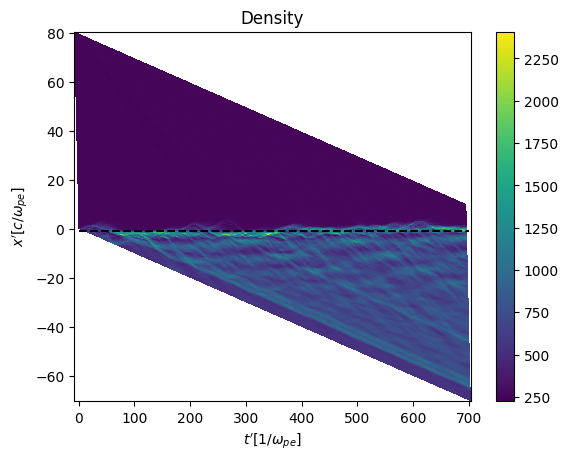

In [70]:
d_min, d_max = np.abs(density).min(), np.abs(density).max()

c = plt.pcolormesh(time_prime,x_prime, density, vmin = d_min, vmax = d_max)
plt.colorbar(c)
plt.ylabel(r'$x^\prime [c/\omega_{pe}]$')
plt.xlabel(r'$t^\prime [1/\omega_{pe}]$')
plt.hlines(-1,0,700, colors = 'black', linestyles= '--')
plt.title('Density')
plt.show()

In [94]:
## pull data

b1_path = 'data/MS/FLD/part_b1/'
b2_path = 'data/MS/FLD/part_b2/'
b3_path = 'data/MS/FLD/part_b3/'

b1= get_osiris_quantity_1d(b1_path)
b1_0 = vysxd_get_data(f'{b1_path}part_b1-000000.h5') ##can use this for easy labeling

b2 = get_osiris_quantity_1d(b2_path)
b2_0 = vysxd_get_data(f'{b2_path}part_b2-000000.h5')

b3 = get_osiris_quantity_1d(b3_path)
b3_0 = vysxd_get_data(f'{b3_path}part_b3-000000.h5')


e1_path = 'data/MS/FLD/part_e1/'
e2_path = 'data/MS/FLD/part_e2/'
e3_path = 'data/MS/FLD/part_e3/'

e1 = get_osiris_quantity_1d(e1_path)
e1_0 = vysxd_get_data(f'{e1_path}part_e1-000000.h5') ##can use this for easy labeling

e2 = get_osiris_quantity_1d(e2_path)
e2_0 = vysxd_get_data(f'{e2_path}part_e2-000000.h5')

e3 = get_osiris_quantity_1d(e3_path)
e3_0 = vysxd_get_data(f'{e3_path}part_e3-000000.h5')

e_density = get_osiris_quantity_1d('data/MS/DENSITY/electrons/charge/')
e_density_0 = vysxd_get_data('data/MS/DENSITY/electrons/charge/charge-electrons-000000.h5')

p_density = get_osiris_quantity_1d('data/MS/DENSITY/positrons/charge/')
p_density_0 = vysxd_get_data('data/MS/DENSITY/positrons/charge/charge-positrons-000000.h5')

e_ufl = get_osiris_quantity_1d('data/MS/UDIST/electrons/ufl1/')
e_ufl_0 = vysxd_get_data('data/MS/UDIST/electrons/ufl1/ufl1-electrons-000000.h5')

FileNotFoundError: [Errno 2] No such file or directory: 'data/MS/UDIST/ions/ufl1/'

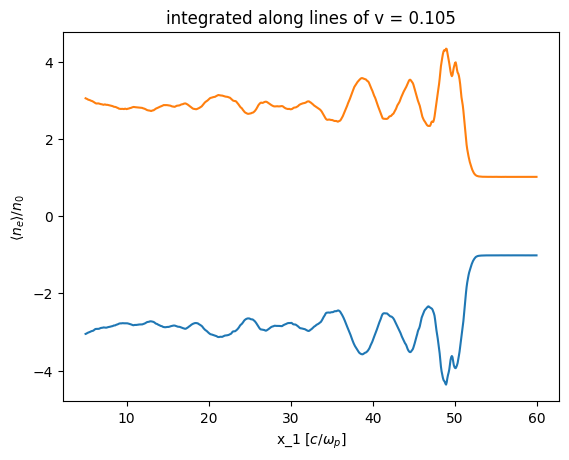

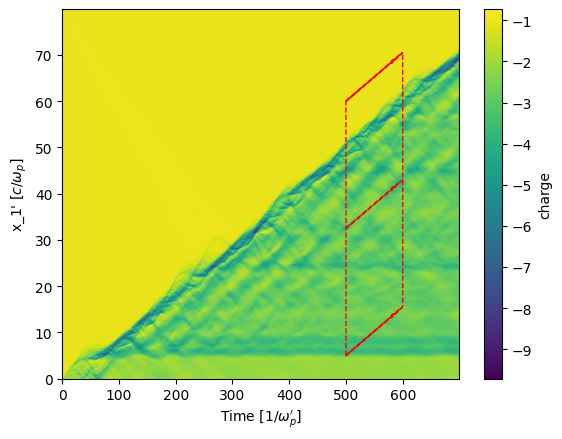

In [64]:
xmin = 5; xmax = 60; tmin = 500;tmax =600; v=.105

electron_density_integrated = box_integrate(q=e_density,xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, q_0=e_density_0, plot_flag=True)
positron_density_integrated = box_integrate(q=p_density,xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, q_0=p_density_0, plot_flag=True)
plt.ylabel(r'$\langle n_e \rangle /n_0$')

illustrate_box(q=e_density,xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax, v= v, q_0 = e_density_0)

/home/david/schaeffer/basic_shock_large/../vysxd/transform.py:11: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  soln = scipy.integrate.quad(lambda t: 1/(t1-t0)*q_f([t, v*(t-t0)+x0]),t0,t1)


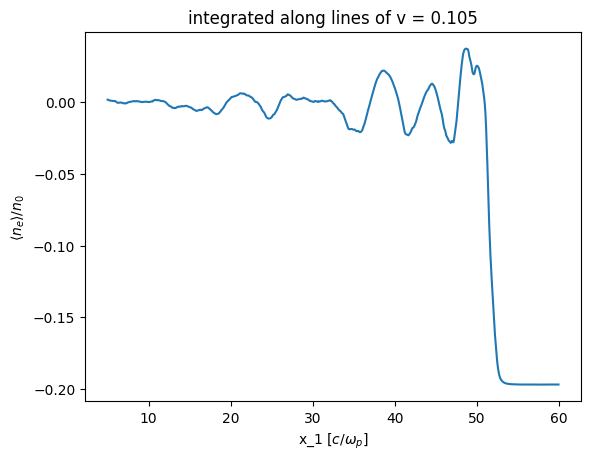

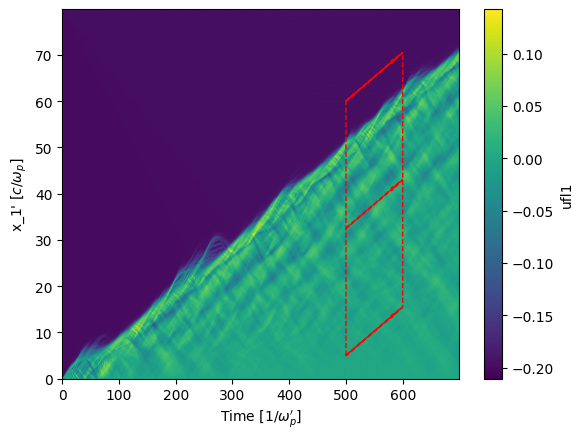

In [65]:
e_ufl_integrated = box_integrate(q=e_ufl,xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, q_0=e_ufl_0, plot_flag=True)
# positron_density_integrated = box_integrate(q=p_density,xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, q_0=p_density_0, plot_flag=True)
plt.ylabel(r'$\langle n_e \rangle /n_0$')

illustrate_box(q=e_ufl,xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax, v= v, q_0 = e_ufl_0)

/home/david/schaeffer/basic_shock_large/../vysxd/transform.py:11: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  soln = scipy.integrate.quad(lambda t: 1/(t1-t0)*q_f([t, v*(t-t0)+x0]),t0,t1)


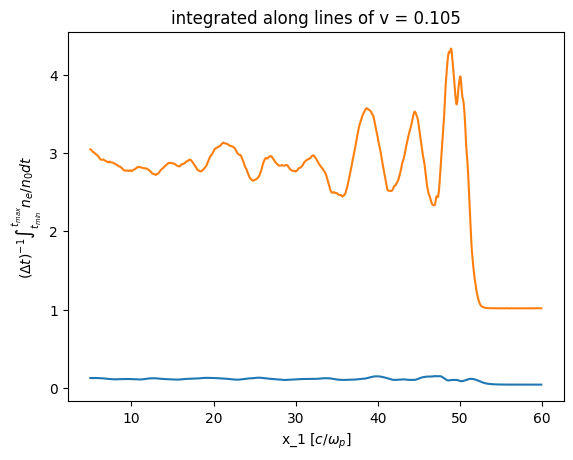

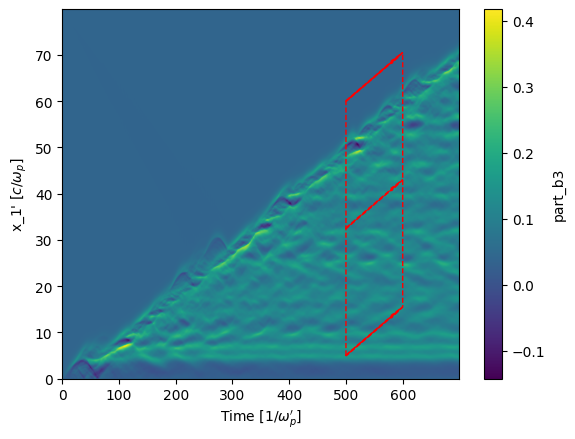

In [91]:
b3_integrated = box_integrate(q=b3,xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, q_0=b3_0)
positron_density_integrated = box_integrate(q=p_density,xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, q_0=p_density_0, plot_flag=True)
# plt.legend()
plt.ylabel('$(\Delta t)^{-1}\int_{t_{min}}^{t_{max}} n_e/n_0 dt$')

illustrate_box(q=b3,xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax, v= v, q_0 = b3_0)

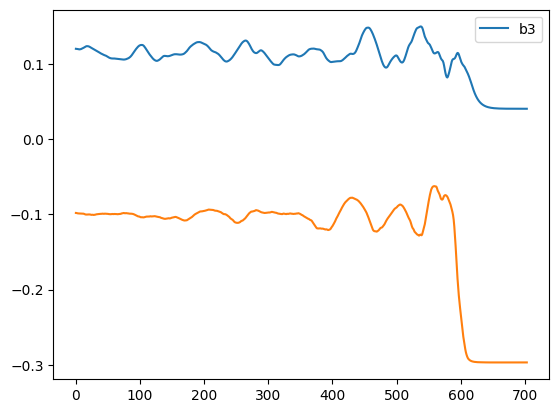

In [90]:
plt.plot(b3_integrated, label = 'b3')
# plt.plot(positron_density_integrated, label = 'density')
plt.plot(((-0.1)+e_ufl_integrated))
plt.legend()

/home/david/schaeffer/basic_shock_large/../vysxd/transform.py:11: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  soln = scipy.integrate.quad(lambda t: 1/(t1-t0)*q_f([t, v*(t-t0)+x0]),t0,t1)


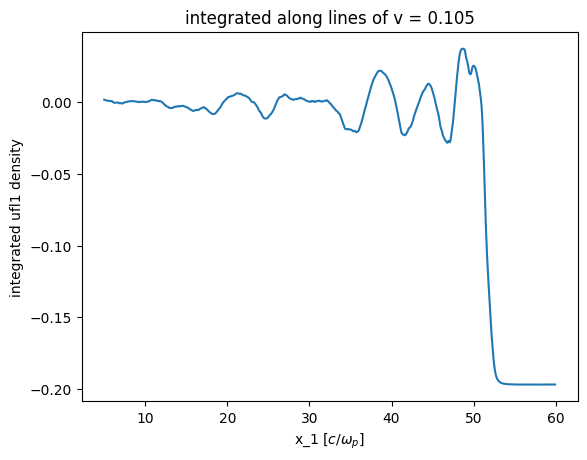

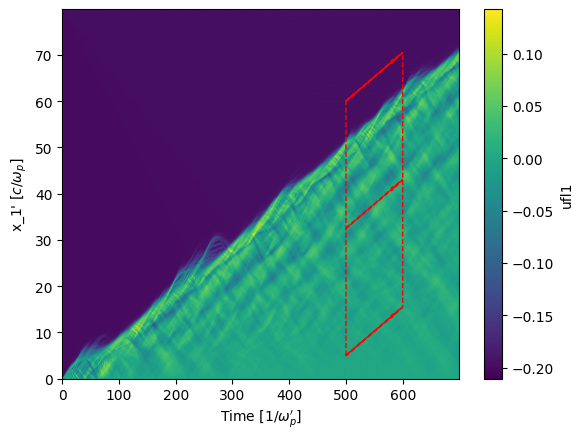

In [92]:
e_ufl_integrated = box_integrate(q=e_ufl,xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, q_0=e_ufl_0)

illustrate_box(q=e_ufl,xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, q_0=e_ufl_0)

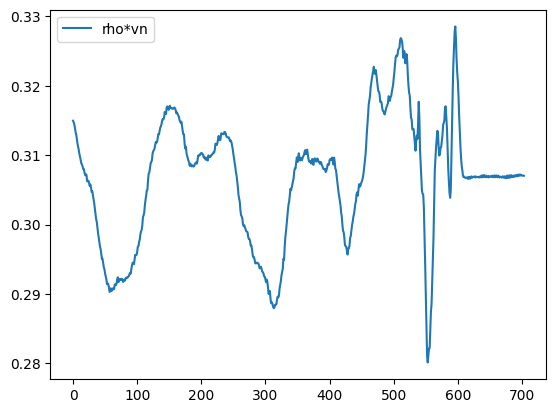

In [93]:
plt.plot((-v+e_ufl_integrated)*electron_density_integrated, label = "rho*vn")
# plt.plot((-0.1+e_ufl_integrated), label = 'ufl')
# plt.plot(electron_density_integrated, label = 'density')
plt.legend()

In [4]:
b1_integrated = box_integrate(q=b1,xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, q_0=b1_0)

illustrate_box(q=b1,xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, q_0=b1_0)

NameError: name 'xmin' is not defined

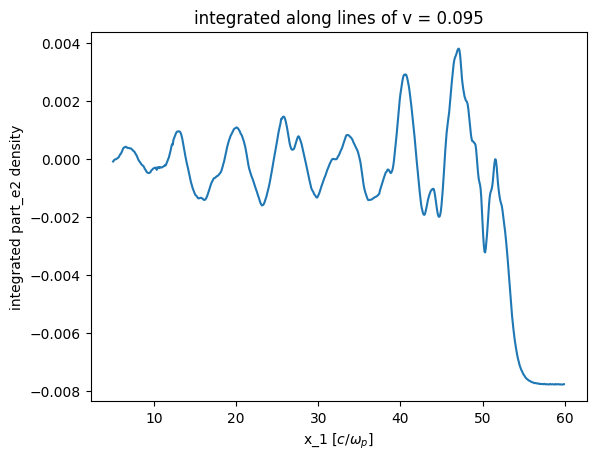

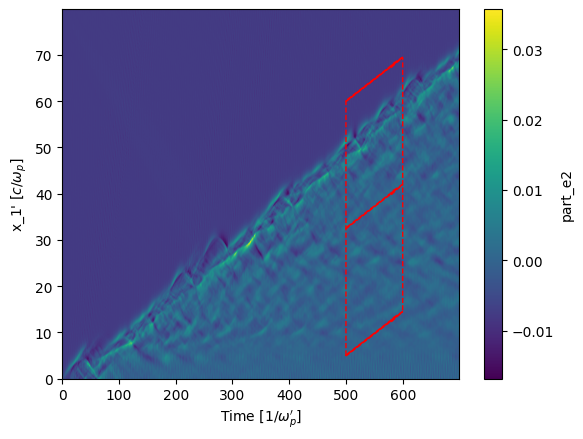

In [9]:
e2_integrated = box_integrate(q=e2,xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, q_0=e2_0)

illustrate_box(q=e2,xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, q_0=e2_0)

It looks like the tangential E field is not continuous... let's try transforming it

In [12]:
def field_transform(v: float, e_: np.array, b_: np.array):
    gamma = 1/np.sqrt(1-v**2)

    e1 = e_[0]
    b1 = b_[0]
    # I flipped the signs...
    e2 = gamma*(e_[1] - v*b_[2])
    b2 = gamma*(b_[1] + v*e_[2])

    e3 = gamma*(e_[2] + v*b_[1])
    b3 = gamma*(b_[2] - v*e_[1])
    return [e1,e2,e3], [b1,b2,b3]

eprime, bprime = field_transform(v= v,e_=[e1[0],e2[0],e3[0]],b_=[b1[0],b2[0],b3[0]])

/home/david/schaeffer/basic_shock_large/../vysxd/transform.py:11: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  soln = scipy.integrate.quad(lambda t: 1/(t1-t0)*q_f([t, v*(t-t0)+x0]),t0,t1)


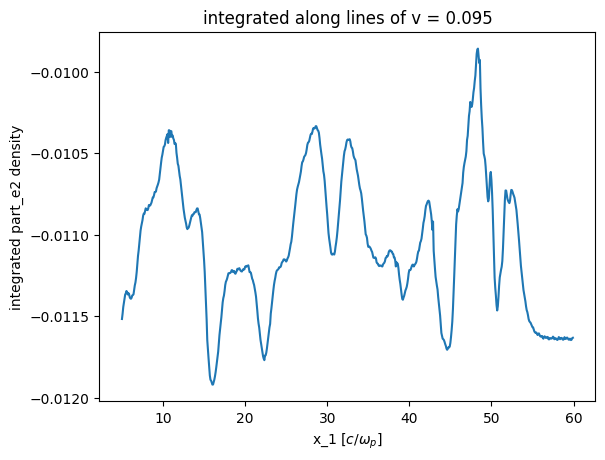

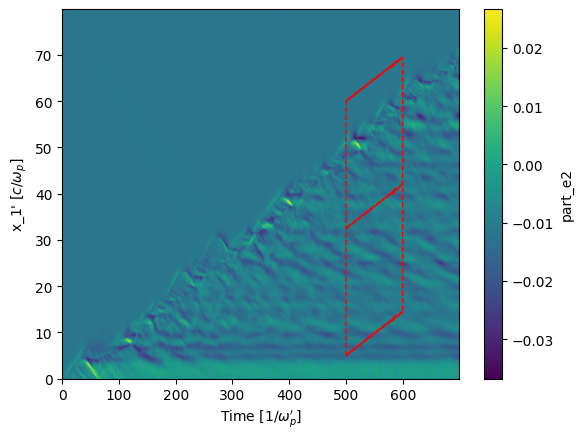

In [36]:
e2_integrated = box_integrate(q=[eprime[1],e2[1],e2[2],e2[3],e2[4]],xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, q_0=e2_0)

illustrate_box(q=[eprime[1],e2[1],e2[2],e2[3],e2[4]],xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, q_0=e2_0)

That did not fix it, let's see if $[v \times B]_{T}$ is continuous

/home/david/schaeffer/basic_shock_large/../vysxd/transform.py:11: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  soln = scipy.integrate.quad(lambda t: 1/(t1-t0)*q_f([t, v*(t-t0)+x0]),t0,t1)


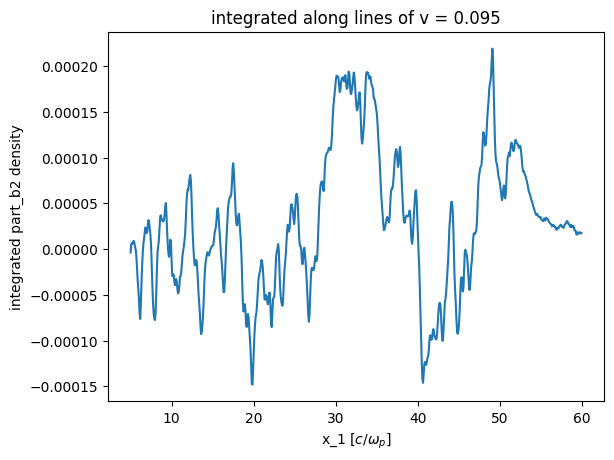

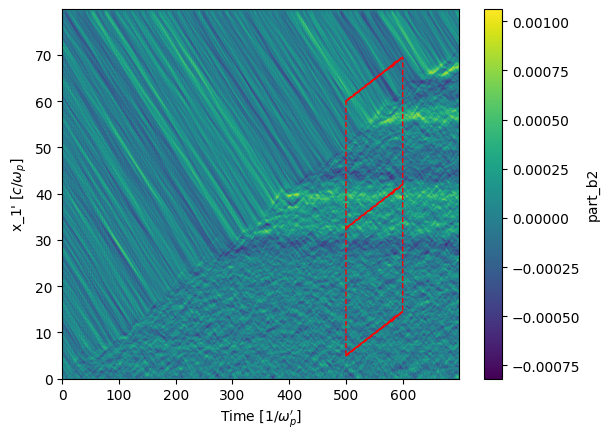

In [14]:
b2_integrated = box_integrate(q=[bprime[1],b2[1],b2[2],b2[3],b2[4]],xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, q_0=b2_0)

illustrate_box(q=[bprime[1],b2[1],b2[2],b2[3],b2[4]],xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, q_0=b2_0)

/home/david/schaeffer/basic_shock_large/../vysxd/transform.py:11: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  soln = scipy.integrate.quad(lambda t: 1/(t1-t0)*q_f([t, v*(t-t0)+x0]),t0,t1)


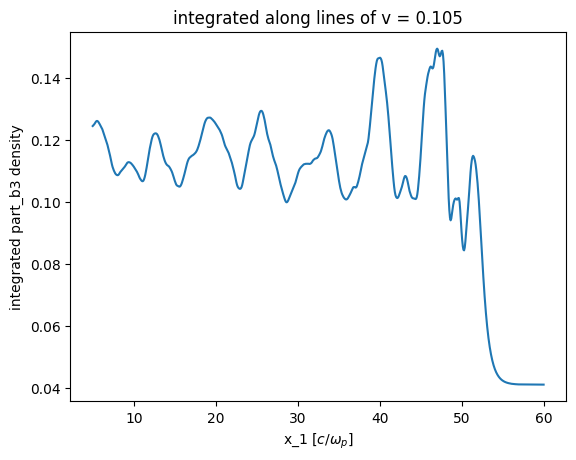

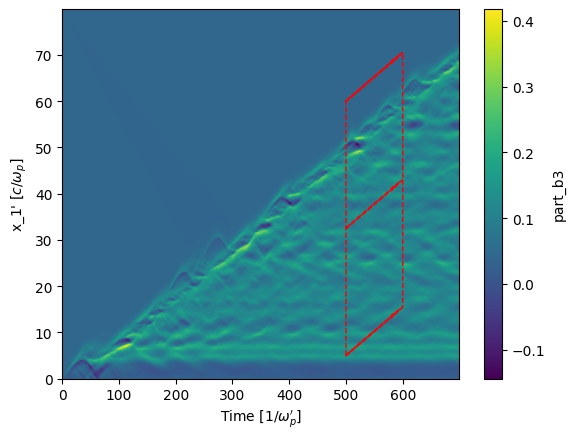

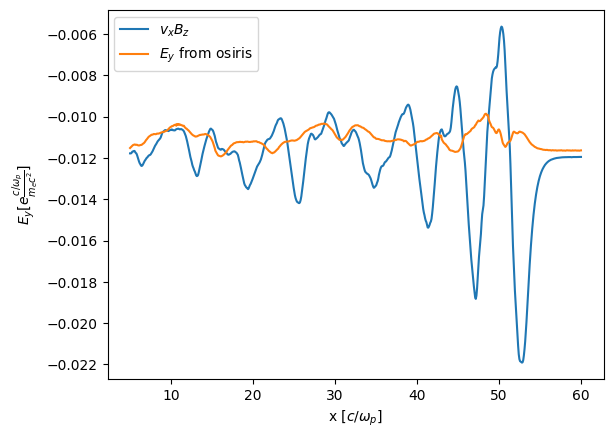

In [63]:
b2_integrated = box_integrate(q=[bprime[2],b3[1],b3[2],b3[3],b3[4]],xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, q_0=b3_0)

illustrate_box(q=[bprime[2],b3[1],b3[2],b3[3],b3[4]],xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, q_0=b3_0)

plt.plot(np.linspace(xmin,xmax, len(b3_integrated)), np.multiply((-.1+e_ufl_integrated),b3_integrated),label= "$v_x B_z$")
plt.plot(np.linspace(xmin,xmax, len(b3_integrated)), e2_integrated, label = '$E_y$ from osiris')
plt.xlabel('x $[c/\omega_p]$')
plt.ylabel(r'$E_y [e \frac{c / \omega_p}{m_e c^2}]$')
plt.legend()


/home/david/schaeffer/basic_shock_large/../vysxd/transform.py:11: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  soln = scipy.integrate.quad(lambda t: 1/(t1-t0)*q_f([t, v*(t-t0)+x0]),t0,t1)


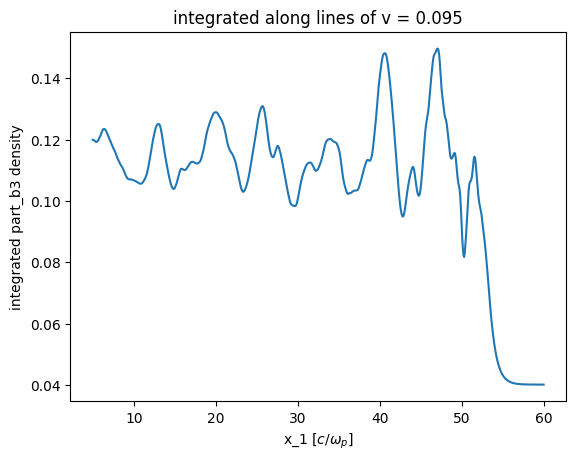

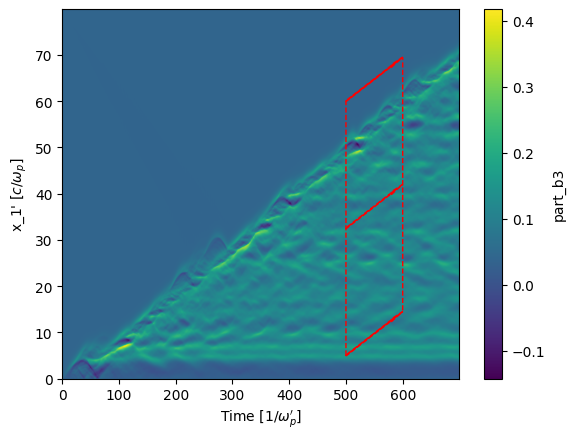

In [10]:
b3_integrated = box_integrate(q=b3,xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, q_0=b3_0)

illustrate_box(q=b3,xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, q_0=b3_0)

/home/david/schaeffer/basic_shock_large/../vysxd/transform.py:11: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  soln = scipy.integrate.quad(lambda t: 1/(t1-t0)*q_f([t, v*(t-t0)+x0]),t0,t1)
/home/david/schaeffer/basic_shock_large/../vysxd/transform.py:11: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  soln = scipy.integrate.quad(lambda t: 1/(t1-t0)*q_f([t, v*(t-t0)+x0]),t0,t1)


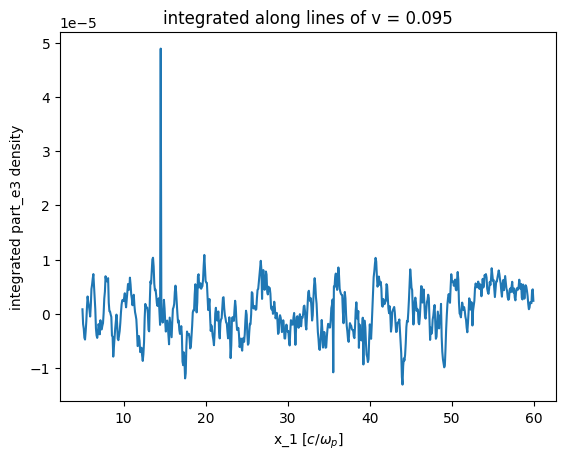

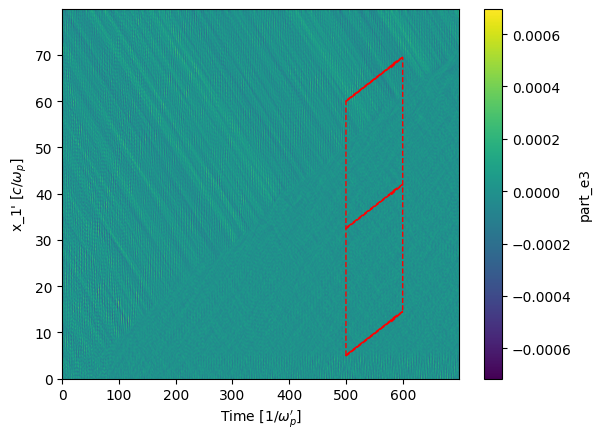

In [18]:
e3_integrated = box_integrate(q=e3,xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, q_0=e3_0)

illustrate_box(q=e3,xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = v, q_0=e3_0)

/home/david/schaeffer/basic_shock_large/../vysxd/transform.py:11: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  soln = scipy.integrate.quad(lambda t: 1/(t1-t0)*q_f([t, v*(t-t0)+x0]),t0,t1)
/home/david/schaeffer/basic_shock_large/../vysxd/transform.py:11: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  soln = scipy.integrate.quad(lambda t: 1/(t1-t0)*q_f([t, v*(t-t0)+x0]),t0,t1)


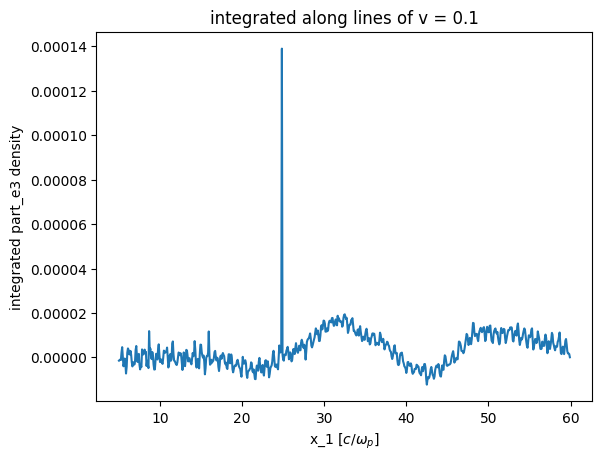

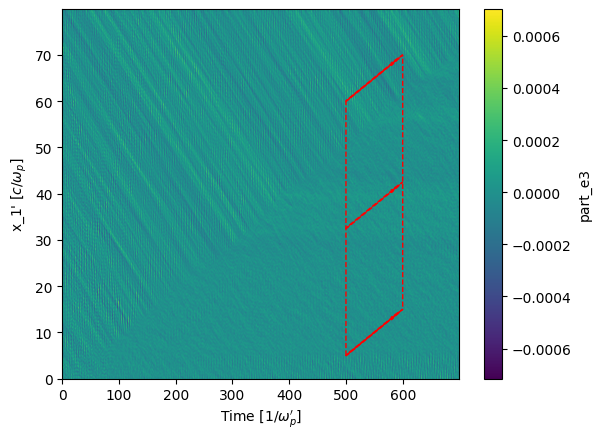

In [19]:
e3_prime_integrated = box_integrate(q=[eprime[2],e3[1],e3[2],e3[3],e3[4]],xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = .1, q_0=e3_0)

illustrate_box(q=[eprime[2],e3[1],e3[2],e3[3],e3[4]],xmin=xmin,xmax=xmax,tmin=tmin,tmax=tmax,v = .1, q_0=e3_0)